# IMBD Dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 15000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from keras import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.optimizers import RMSprop

# import tensorflow as tf
# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
    
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout=0.0, recurrent_dropout=0.7, return_sequences=True))
model.add(LSTM(32, dropout=0.0, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(32, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          480000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 504,993
Trainable params: 504,993
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(input_train, y_train, epochs=20, batch_size=1024, validation_split=0.2)

C:\Users\mcama\AppData\Roaming\Python\Python36\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 19s 933us/step - loss: 0.6900 - acc: 0.5455 - val_loss: 0.6726 - val_acc: 0.6638
Epoch 2/20
20000/20000 [==============================] - 18s 886us/step - loss: 0.5943 - acc: 0.7071 - val_loss: 0.5159 - val_acc: 0.7458
Epoch 3/20
20000/20000 [==============================] - 18s 897us/step - loss: 0.4408 - acc: 0.8084 - val_loss: 0.4229 - val_acc: 0.8158
Epoch 4/20
20000/20000 [==============================] - 18s 901us/step - loss: 0.3736 - acc: 0.8447 - val_loss: 0.4038 - val_acc: 0.8294
Epoch 5/20
20000/20000 [==============================] - 18s 901us/step - loss: 0.3353 - acc: 0.8681 - val_loss: 0.3978 - val_acc: 0.8344
Epoch 6/20
20000/20000 [==============================] - 18s 902us/step - loss: 0.3048 - acc: 0.8805 - val_loss: 0.4006 - val_acc: 0.8284
Epoch 7/20
20000/20000 [==============================] - 18s 904us/step - loss: 0.2660 - acc: 0.9004 - val_loss: 0.4

In [4]:
# from keras import Sequential
# from keras.layers import LSTM, Embedding, Dense
# from keras.utils import multi_gpu_model

# model = Sequential()
# parallel_model = multi_gpu_model(model, gpus=2)

# parallel_model.add(Embedding(max_features, 32))
# parallel_model.add(LSTM(32))
# parallel_model.add(Dense(1, activation='sigmoid'))

# parallel_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = parallel_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

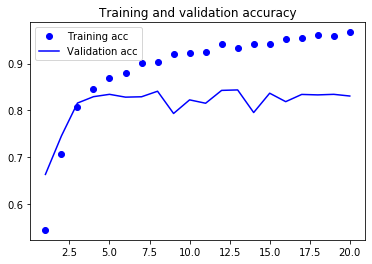

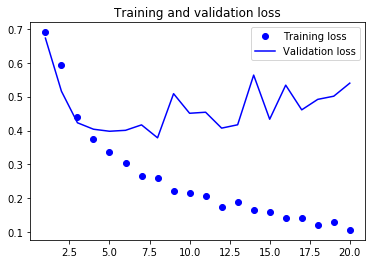

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()